#  Unit 4.3a Parallel Computing
> Observe an algorithm using parallel computing in Python Code.  Monitor processes on host.

## Analyzing Parallel Computing
> Once again we will use image lab, this time to review Parallel Computing.
- Change baseWidth in this line in code to increase computation requirements: ```def process_image(image, baseWidth=512):```  For instance 320, 512, 1024, 2048, 4096.

- Compare Sequential and Parallel computing code and time to achieve outputs

**Response**

* The sequential computing time is 5.4 seconds, while the parallel computing code time is 5.6 seconds. Usually, parallel computing should be faster than sequential computing. In my case, the slower time may be due to that my laptop does not have the best performance. 

## Notes

* Helpful links:
  * [Pillow documentation](https://pillow.readthedocs.io/en/stable/reference/Image.html)


For reference below, whenever there is <code>img</code>, it is the same thing as <code><em>img object</em></code>

<code>pilImage.open(<em>path to img</em>)</code>: Opens image so that you can get information about it

`img.mode`: Return the format of the pixel, ex: whether it is in RGB, CMYK, etc.

<code>img.resize(<em>tuple with new width and height</em>)</code>: Resize the image based on the width and height provided

`img.getdata()`: Returns the contents of the image (the RGB values of the pixels)

`numpy.array(img.getdata())`: Puts the `img.getdata()` contents in an array.

<code><em>"string</em><strong> %s</strong>" % </code>

<code>img.save(<em>filename</em>, <em>format</em>)</code>: <code><em>format</em></code> is the file extension of the image. (Not sure if you specify it as <code><em>format</em></code> or <code>format=<em>format</em></code>; refer to [this](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.save) link). 

<br>

<code>with BytesIO() as buffer</code>: Not 100% sure about this, but probably has something to do with streams. The `with` statement simplifies code so that you don't need to call the `.close()` method. (However, this applies to files, not sure if it is the same with bytes)

In `with BytesIO() as buffer`, the `buffer` is something similar to a variable (I think). If this is true, that means that `img.save(buffer, format)` is the same as `img.save(BytesIO(), format)`. Since `BytesIO` is the memory, then this saves the image into the memory.

The reason why the image needs to be saved into memory and you can't directly access it with `img` is because the next line of code includes `getvalue()`, which only works with BytesIO and not `img`. 

<br>

`.getvalue()`: Returns the contents of the buffer in bytes

<code>base64.b64encode(<em>bytes</em>)</code>: Encode bytes in base64

<br>

`.decode()`: <mark>IMPORTANT</mark>: This is not a method of the `base64` library! In other words, tis is not `base64.decode()`. `.decode()` is actually a method in Python. Without any parameters, it takes the encoded string and "decodes" it. By "decoding", the string isn't actually decoded. I'm not sure how this works, but my guess is that it makes the string appear as if it isn't encoded anymore. 

When a string is encoded, it looks like this:

![](images/CSP/CSP-w28-class-unit4_3aParallelComputing-base64Encode.jpg)

Notice the `b'` characters at the front.

Now, once it is decoded, the `b'` characters are gone:

![](images/CSP/CSP-w28-class-unit4_3aParallelComputing-base64Decode.jpg)

<br>

<code>.putdata(<em>rgb values</em>)</code>: Change pixels of image with rgb inputs that you specified

<code>display(HTML(<em>HTML code for image</em>))</code>: IPython displays image based on HTML code (in this case, HTMl works with base64 encoded values)

In [92]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as PIL Image is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

path = Path("images/clouds-impression.png")
img = pilImage.open(path)

# test = '<img src="data:image/png;base64,%s">'
# print(test)




In [84]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as PIL Image is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np


# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Scale to baseWidth
def scale_image(img, baseWidth):
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()
    
# Convert pixels to Grey Scale
def grey_pixel(pixel):
    average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
    if len(pixel) > 3:
        return( (average, average, average, pixel[3]) ) # PNG format
    else:
        return( (average, average, average) )
    
# Convert pixels to Red Scale
def red_pixel(pixel):
    if len(pixel) > 3:
        return( (pixel[0], 0, 0, pixel[3]) ) # PNG format
    else:
        return( (pixel[0], 0, 0) )
    
# Convert pixels to Red Scale
def green_pixel(pixel):
    if len(pixel) > 3:
        return( (0, pixel[1], 0, pixel[3]) ) # PNG format
    else:
        return( (0, pixel[1], 0) )
    
# Convert pixels to Red Scale
def blue_pixel(pixel):
    if len(pixel) > 3:
        return( (0, 0, pixel[2], pixel[3]) ) # PNG format
    else:
        return( (0, 0, pixel[2]) )
        
# Set Properties of Image, Scale, and convert to Base64
def image_management(image, baseWidth):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img, baseWidth)
    image['pil'] = img
    image['scaled_size'] = img.size
    image['numpy'] = np.array(img.getdata())
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
    # Grey HTML
    # each pixel in numpy array is turned to grey 
    # then resulting list, using List Comprehension, is put back into img    
    img.putdata([grey_pixel(pixel) for pixel in image['numpy']])
    image['html_grey'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Red HTML
    img.putdata([red_pixel(pixel) for pixel in image['numpy']])
    image['html_red'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Green HTML
    img.putdata([green_pixel(pixel) for pixel in image['numpy']])
    image['html_green'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Blue HTML
    img.putdata([blue_pixel(pixel) for pixel in image['numpy']])
    image['html_blue'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
# original baseWidth = 512
def process_image(image, baseWidth=50):
    image_management(image, baseWidth)
    print("---- meta data -----")
    print(image['label'])
    print(image['source'])
    print(image['format'])
    print(image['mode'])
    print("Original size: ", image['size'])
    print("Scaled size: ", image['scaled_size'])
    
    print("-- images --")
    display(HTML(image['html'])) 
    display(HTML(image['html_grey'])) 
    display(HTML(image['html_red'])) 
    display(HTML(image['html_green'])) 
    display(HTML(image['html_blue'])) 



---- meta data -----
Green Square
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (50, 50)
-- images --



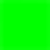


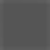


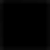


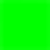


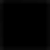

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (50, 36)
-- images --



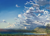


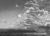


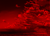


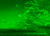


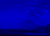

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (50, 37)
-- images --



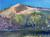


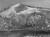


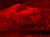


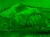


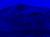

In [87]:
# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # setup default images
    images = image_data()
    # Sequential Processing    
    for image in images:
        process_image(image)
    
    print()

## Sequential Processing 
> The for loop iterates over the list of images and processes them one at a time, in order.

---- meta data -----
Green Square
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (512, 512)
-- images --



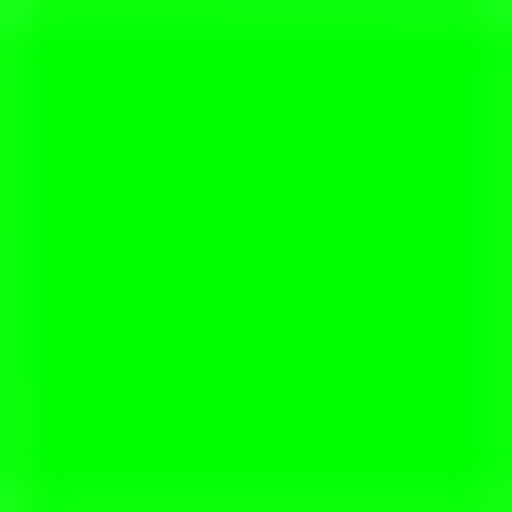


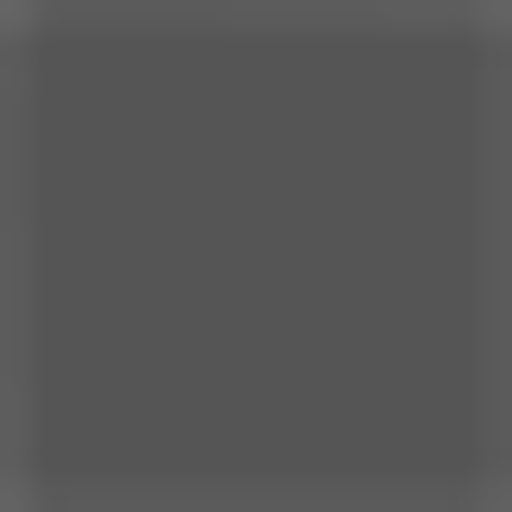


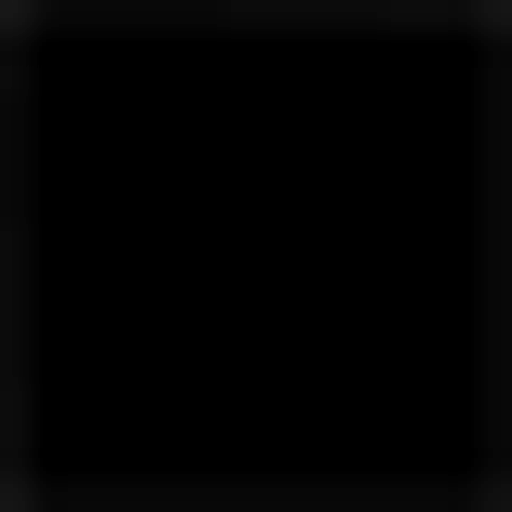


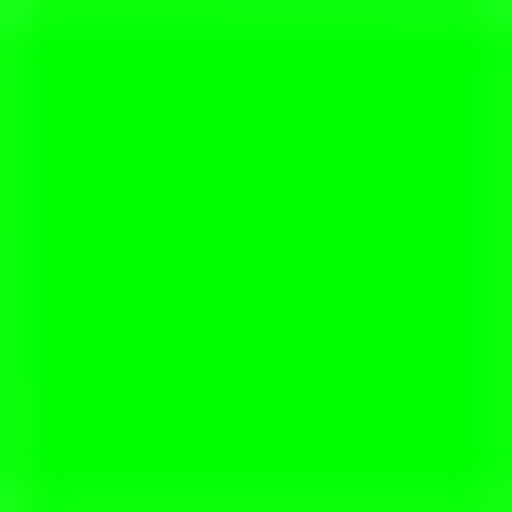


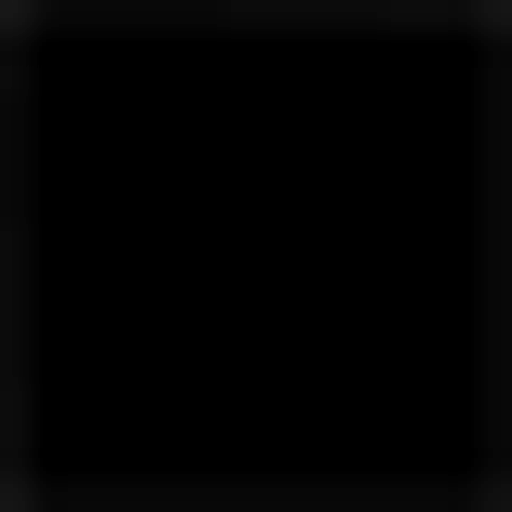

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (512, 374)
-- images --



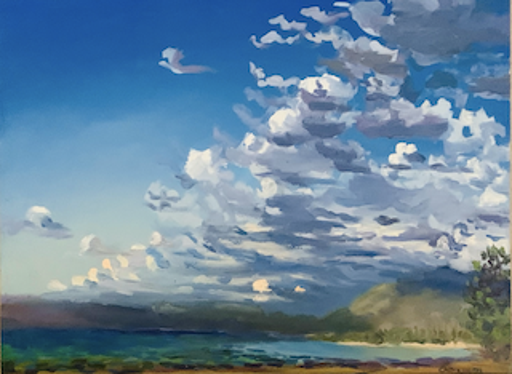


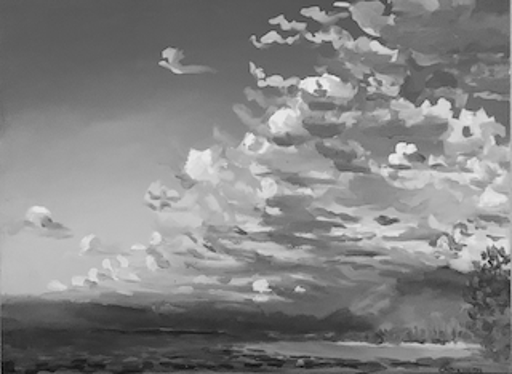


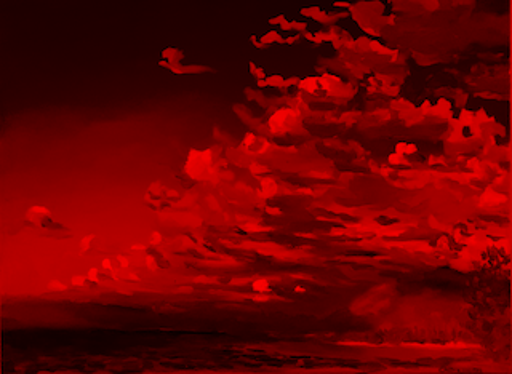


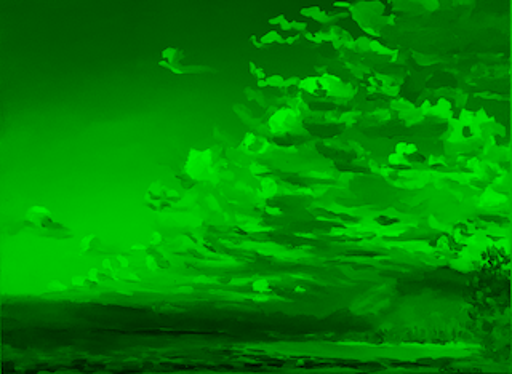


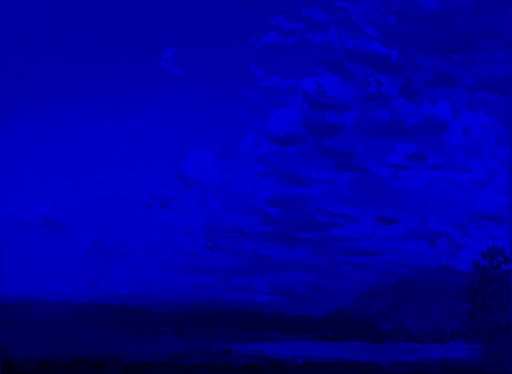

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (512, 384)
-- images --



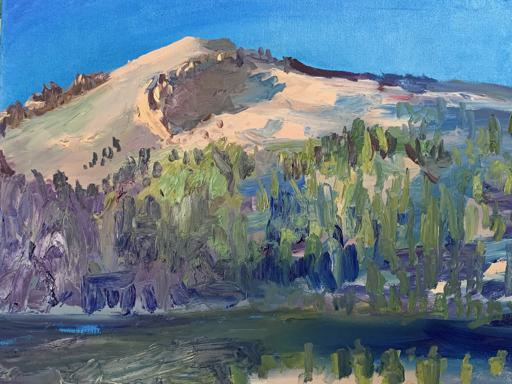


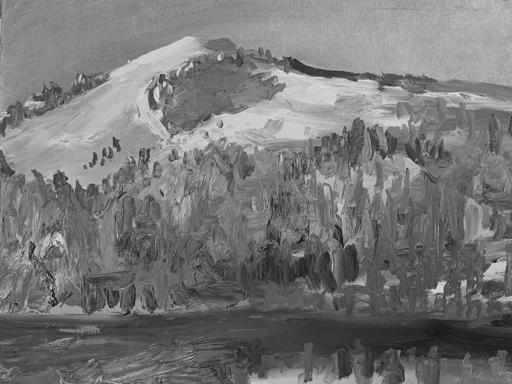


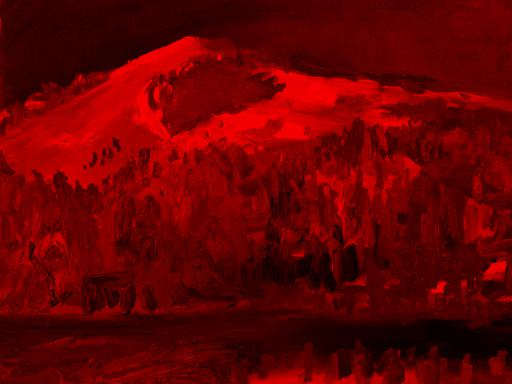


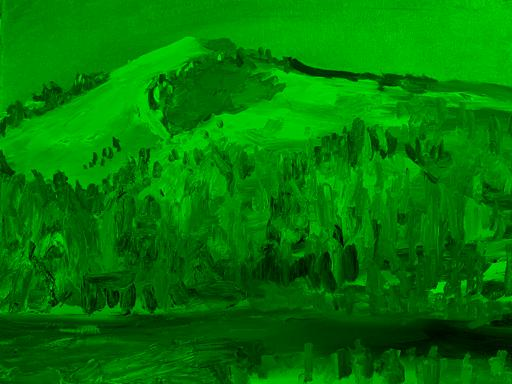


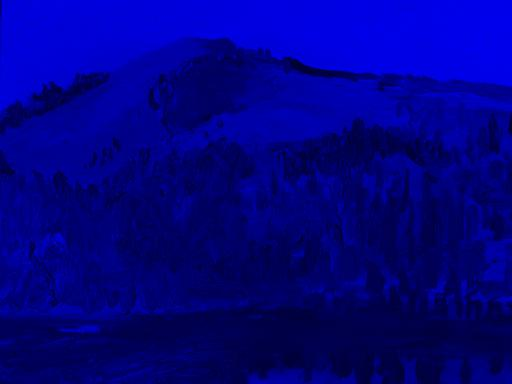

In [8]:
# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # setup default images
    images = image_data()

    # Sequential Processing    
    for image in images:
        process_image(image)
        
    print()

## Parallel Computing

 > In parallel or concurrent mode, the ThreadPoolExecutor is used to submit each image to a separate worker thread, allowing multiple images to be processed simultaneously. Multithreading allows multiple concurrent tasks of a process at the same time. The executor.map() method is used to apply the process_image function to each image in the images list.  
 - The order in which the images are processed is not guaranteed, as threads are performed simultaneously.

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (512, 384)
-- images --



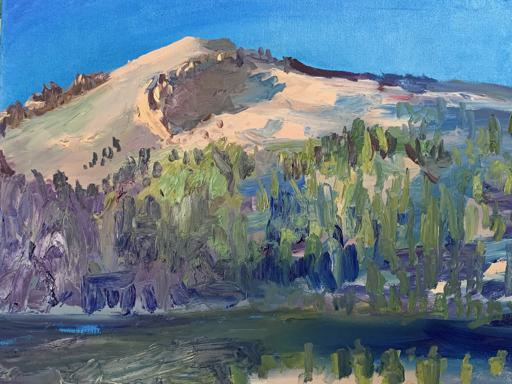


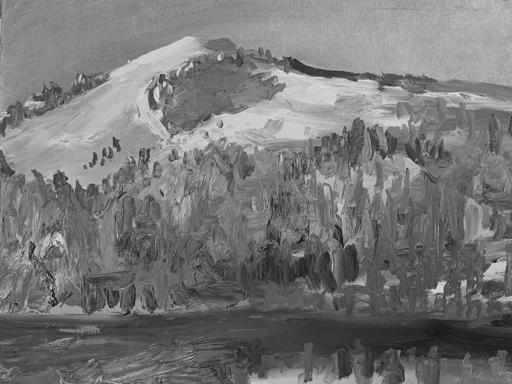


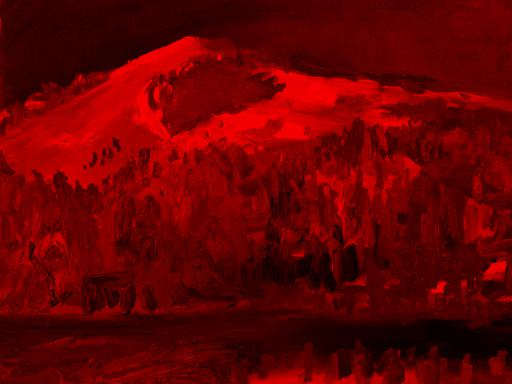


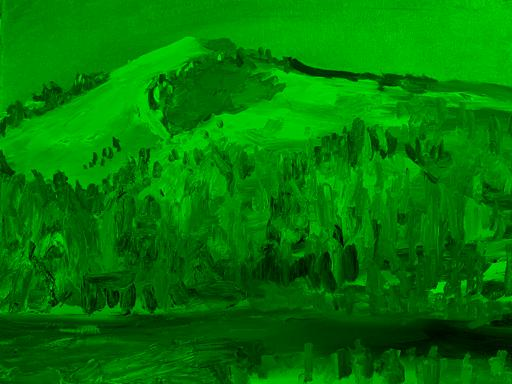

---- meta data -----
Green Square
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (512, 512)
-- images --



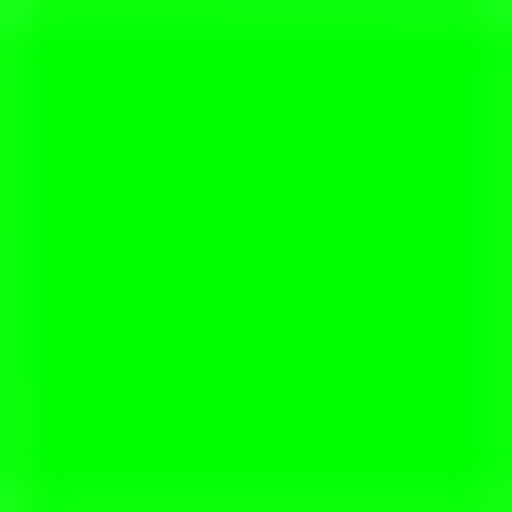


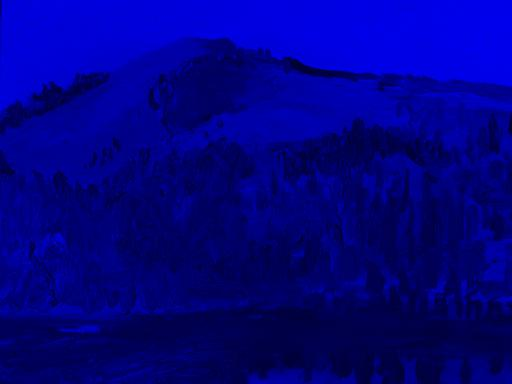


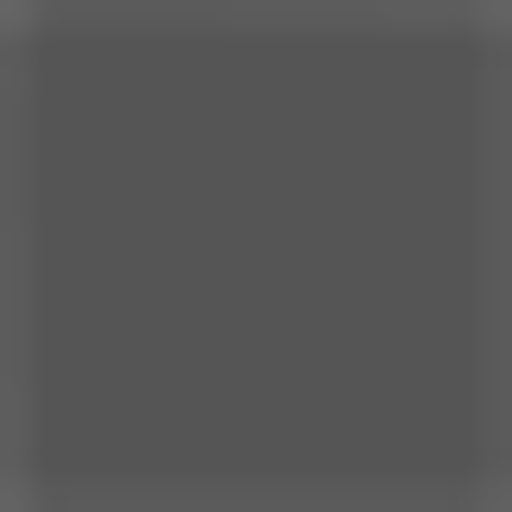


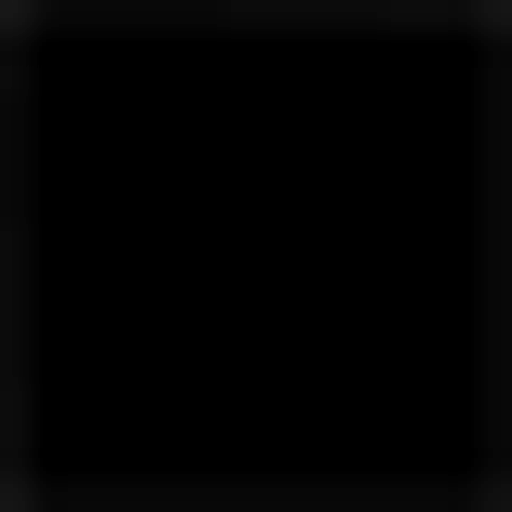


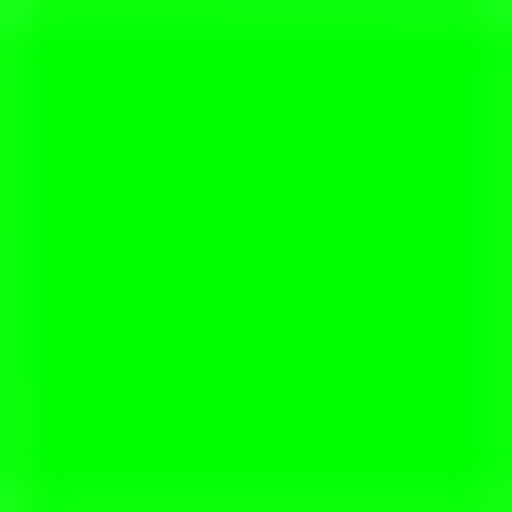


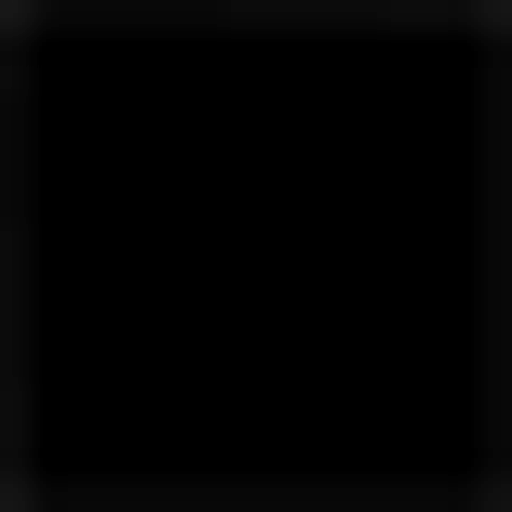

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (512, 374)
-- images --



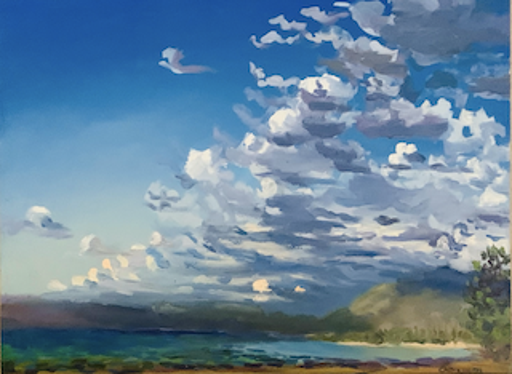


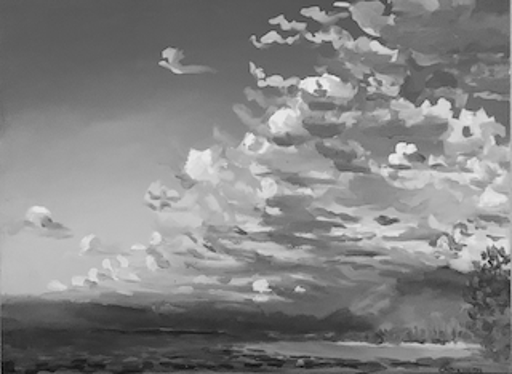


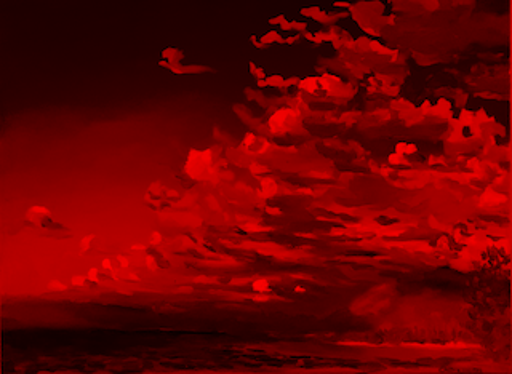


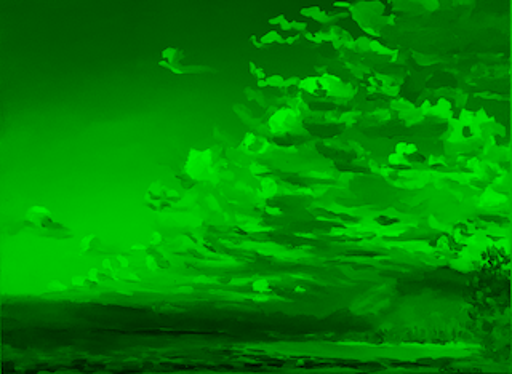


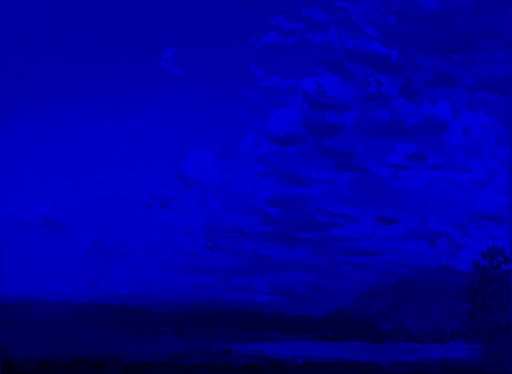

In [9]:
import concurrent.futures

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # setup default images
    images = image_data()
    
    # Parallel Processsing
    # executor allocates threads, it considers core execution capability of machine
    with concurrent.futures.ThreadPoolExecutor() as executor:
        executor.map(process_image, images)  # order is not predictable
        
    print()

## Observing Parallel Computing and Threads
> You can observe Processes, CPU Percentage, and Threads with Tools on your machine. Common tools to monitor performance are Activity Monitor on MacOS or Task Manager on Windows.   

- This example is using ```top``` launched in VSCode Terminal. (mac)
- Try ```top -H``` for linux.
    - PID is Process ID.  
    - COMMAND is task running on machine.  Python is activated when running this Jupyter notebook.
    - #TH is number of threads.   This increases from 15/1 to 18/1 on my machine when running python parallel computing example.


## Hacks
> AP Classroom. Provide answers and thoughts on theoritical question form college board Video in section 4.3.  They start at about the 9 minute mark.
- Example 1
  * **Reponse**: The answer is 50 seconds. This is because you can combine process Y and Z together to get the minimum time, which leaves the maximum time being the minimum of times for running it in parallel.
- Example 2
  * **Response**: 25 seconds. The time it takes for running in parallel is 45 seconds. The time for running in sequential is 70 seconds. 70-45 = 25. 

**Response**: 
* Example 3: A and B, C and D should be assigned together so that both take 50 seconds to run.

> Data Structures.  Build a List Comprehension example
- list = [calc(item) for item in items]

## List comprehension

Original picture: 


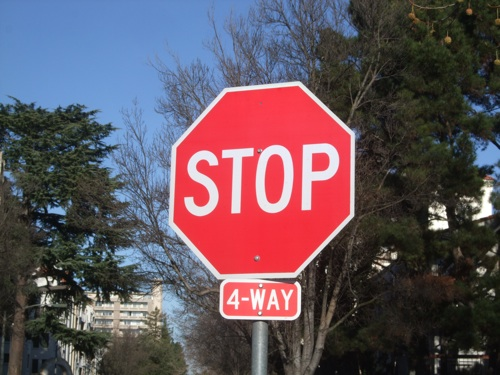

Red screening: 


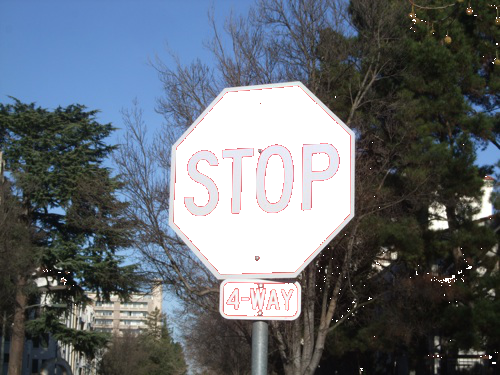

In [108]:
from IPython.display import HTML, display, Image
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from PIL import ImageEnhance
from PIL import ImageFilter
import PIL
from io import BytesIO
import base64
import numpy as np


# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    
    img = pilImage.open('images/stop.jpg')
    rgba = img.convert('RGBA')
    data = rgba.getdata()
    green_rgb = (0, 128, 0)  # change it to your exact bg color
    
    #average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
    

    #new_data = [item if item[:-1][0] == 0 else (255, 255, 255, 0) for item in data]
    
    avg_data = []
    [avg_data.append((item[0] + item[1] + item[2]) // 3) for item in data]
    
    new_data = []
    [new_data.append((255, 255, 255, 0)) if data[i][0] >= avg_data[i] * 1.5 else new_data.append(data[i]) for i in range(len(data))]
    
    

    rgba.putdata(new_data)
    rgba.save('changed.png', 'PNG')


    print("Original picture: ")
    path = Path("images/stop.jpg")
    display(Image(path))
    print("Red screening: ")
    path = Path("changed.png")
    display(Image(path))